<img src="img/512px-Cart-pendulum.svg.png">



如图所示(我设的方程来自现代控制系统，那里摆向右偏是正方向)，倒立摆符合以下微分方程组：

$$
\begin{align*}
(M+m) \ddot{x} - ml\ddot{\theta}\cos \theta + ml \dot{\theta}^2\sin \theta &= F \\
l\ddot{\theta} - g \sin\theta &= \ddot{x} \cos \theta
\end{align*}
$$

第二个，即转矩方程易于理解。写出其消元前的形式：

$$
ml^2 \ddot{\theta} - mgl\sin \theta =ml\cos \theta \ddot{x} 
$$

可以看到$ml^2 \ddot{\theta} = J \ddot{\theta}$，其中$J = \sum m r^2=ml^2$为转动惯量，
在此质点型小球上有简单的形式。从而这就是转动方程的动力的加速那一边。另外两个项则为小球
两个坐标的分运动对其的贡献。其中$l\sin \theta$为垂直的力臂长，乘以重力$mg$即为垂直对转动的力矩。$l\cos \theta$则为向右的水平力的力臂。$m \ddot{x}$为动力，由小车作用给它。

对于第一个方程，外力除了使得小车和小球具有向右的加速度外，还应分解出小球对水平运动外
两种相对于水平运动等效运动对于力的要求。这里略去。

微分方程中具有$\ddot{\theta}\cos \theta$之类的交叉项或函数，较为复杂，我们可以在$\theta = 0,x = 0$处取线性逼近，有$\sin \theta \approx \theta,\cos \theta \approx 1,\ddot{\theta}\approx 0$，由设$M$远远大于$m$，则

$$
\begin{align*}
M \ddot{x} - ml \ddot{\theta} &= F \\
l \ddot{\theta} - g \theta &= \ddot{x} 
\end{align*}
$$

除了$\theta$方向反向$u,y$变为$F,x$外，结果与现代控制系统里的线性化版本一致。

我们把wiki版本改写回现代控制系统的符号然后进行模拟：

$$
$$
\begin{align*}
(M+m) \ddot{y} + ml\ddot{\theta}\cos \theta - ml \dot{\theta}^2\sin \theta &= F \\
-l\ddot{\theta} + g \sin\theta &= \ddot{y} \cos \theta
\end{align*}
$$
$$

将$(y,\dot{y},\theta,\dot{\theta})$记为状态变量$(x_1,x_2,x_3,x_4)$，可写出四个微分方程：

$$
\begin{align*}
\dot{x_1} &= x_2 \\
\dot{x_2} &= \frac{-ml\ddot{\theta}\cos \theta}{M+m}+\frac{ml\dot{\theta}^2\sin \theta}{M+m} + \frac{1}{M+m} F
\end{align*}
$$

In [12]:
syms M m l F g ;
syms y(t) theta(t);
ode1 = (M+m) * diff(y,t,2) + m * l * diff(theta,t,2) * cos(theta) - m*l*diff(theta,t)^2 * sin(theta) == F;
ode2 = -l * diff(theta,t,2) + g * sin(theta) == diff(y,t,2) * cos(theta);
odes = [ode1; ode2]

 
odes(t) =
 
 (M + m)*diff(y(t), t, t) - l*m*sin(theta(t))*diff(theta(t), t)^2 + l*m*cos(theta(t))*diff(theta(t), t, t) == F
                                     g*sin(theta(t)) - l*diff(theta(t), t, t) == cos(theta(t))*diff(y(t), t, t)
 



In [24]:
S = dsolve(odes)

> In dsolve (line 201)
 
S =
 
[ empty sym ]
 



In [25]:
[V] = odeToVectorField(odes)

 
V =
 
                                                                                                        Y[2]
 -(F*cos(Y[1]) - M*g*sin(Y[1]) - g*m*sin(Y[1]) + l*m*cos(Y[1])*sin(Y[1])*Y[2]^2)/(l*(M + m - m*cos(Y[1])^2))
                                                                                                        Y[4]
                                (F - g*m*cos(Y[1])*sin(Y[1]) + l*m*sin(Y[1])*Y[2]^2)/(M + m - m*cos(Y[1])^2)
 



In [28]:
M = matlabFunction(V,'vars', {'t','Y', 'F', 'M', 'g', 'l', 'm'})



M =

  function_handle with value:

    @(t,Y,F,M,g,l,m)[Y(2);-(F.*cos(Y(1))-M.*g.*sin(Y(1))-g.*m.*sin(Y(1))+l.*m.*cos(Y(1)).*sin(Y(1)).*Y(2).^2)./(l.*(M+m-m.*cos(Y(1)).^2));Y(4);(F-g.*m.*cos(Y(1)).*sin(Y(1))+l.*m.*sin(Y(1)).*Y(2).^2)./(M+m-m.*cos(Y(1)).^2)]




In [61]:
M([-1 -1], [3 4 5 6], 1, 2, 3, 4, 5)


ans =

    4.0000
    5.7940
    6.0000
   22.9828




In [81]:
dummy = -1;

In [82]:
sol = ode45(M, [0 20], [0.1 0.1 0.1 0.1], dummy, 0.0, 10.0, 9.8, 1.0, 1.0)


sol = 

  struct with fields:

     solver: 'ode45'
    extdata: [1×1 struct]
          x: [1×93 double]
          y: [4×93 double]
      stats: [1×1 struct]
      idata: [1×1 struct]




In [92]:
sol.y(3,:)'


ans =

    0.1000
    0.1019
    0.1106
    0.1278
    0.1337
    0.1261
    0.1271
    0.2059
    0.3330
    0.3727
    0.3677
    0.3642
    0.3706
    0.3861
    0.4100
    0.4372
    0.4712
    0.5270
    0.6079
    0.6142
    0.5436
    0.4997
    0.5162
    0.5869
    0.6430
    0.6819
    0.7111
    0.7335
    0.7511
    0.7562
    0.7490
    0.7518
    0.8346
    0.9547
    0.9985
    0.9945
    0.9906
    0.9965
    1.0115
    1.0354
    1.0629
    1.0955
    1.1488
    1.2296
    1.2552
    1.1842
    1.1354
    1.1398
    1.2074
    1.2704
    1.3119
    1.3423
    1.3659
    1.3843
    1.3912
    1.3865
    1.3833
    1.4548
    1.5832
    1.6353
    1.6311
    1.6296
    1.6375
    1.6552
    1.6802
    1.7081
    1.7399
    1.7904
    1.8696
    1.9120
    1.8679
    1.8016
    1.7927
    1.8359
    1.9055
    1.9563
    1.9915
    2.0206
    2.0444
    2.0659
    2.0777
    2.0737
    2.0697
    2.1991
    2.2948
    2.3260
    2.3227
    2.3199
    2.3256
    2.3389
  

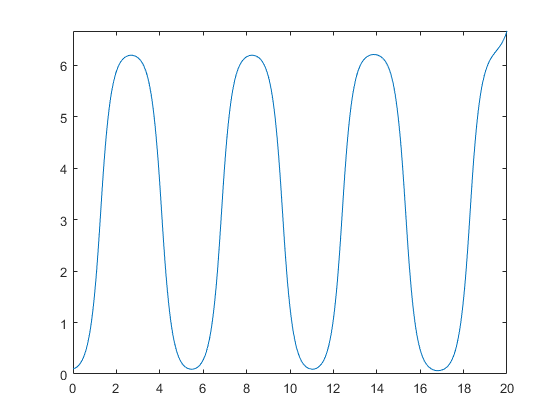

In [83]:
fplot(@(x)deval(sol,x,1), [0, 20])


In [22]:
syms a;
syms x(t);

In [23]:
ode = diff(x,t) == a*x;
dsolve(ode)

 
ans =
 
C1*exp(a*t)
 



In [53]:
f = matlabFunction(odeToVectorField(ode),'vars',{'t','Y','a'})


f =

  function_handle with value:

    @(t,Y,a)[a.*Y(1)]




In [58]:
f(100,2,3)


ans =

     6




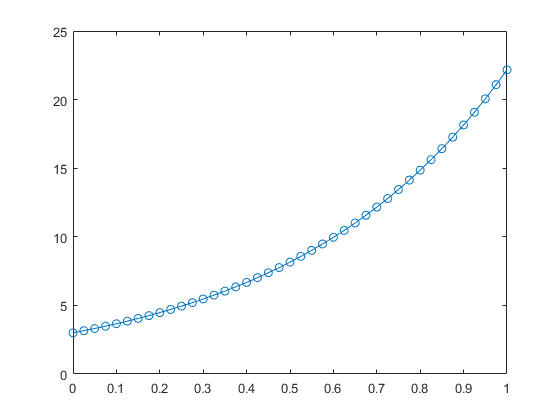

In [80]:
ode45(f, [0 1], [3],[1 3],2)